In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv("speed.csv")
df.drop("s.no",axis=1,inplace=True)
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [5]:
x=df[["speed"]]
x
y=df["dist"]



In [6]:
poly=PolynomialFeatures(degree=2)
poly_feature=poly.fit_transform(x)
poly_feature


array([[  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  19., 361.],
 

In [7]:
x_train,x_test,y_train,y_test=train_test_split(poly_feature,y,test_size=0.2,random_state=42)


In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
y_pred=model.predict(x_test)
y_pred

array([28.65932536, 59.50272054, 46.94675497, 78.09143375, 32.05289332,
       78.09143375, 43.02535108, 39.23590618, 51.00011785, 35.57842026])

In [10]:
mse=mean_squared_error(y_pred,y_test)
mse
rmse=np.sqrt(mse)
rmse
score=r2_score(y_pred,y_test)
score

0.1337588599310412

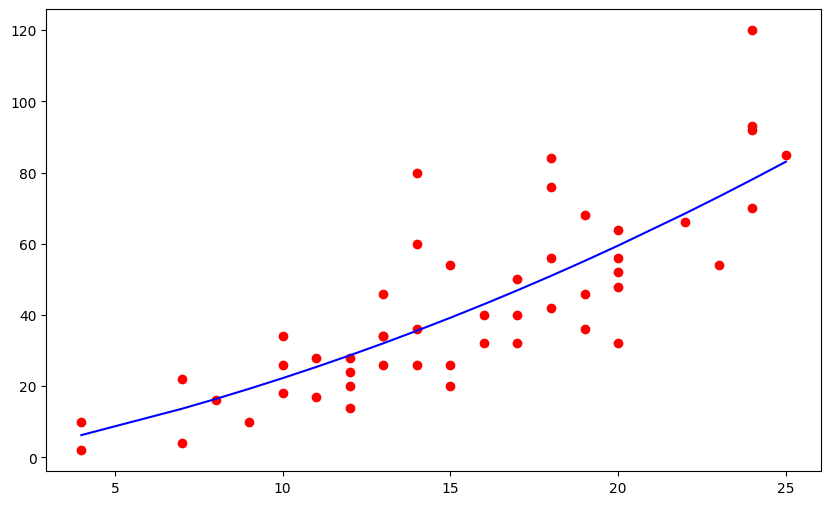

In [11]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.plot(x,model.predict(poly.transform(x)),color="blue")
plt.plot()
plt.show()

In [12]:
newdata=np.array([[1.202405]])
task=poly.fit_transform(newdata)
pre=model.predict(task)
pre

array([0.42179364])

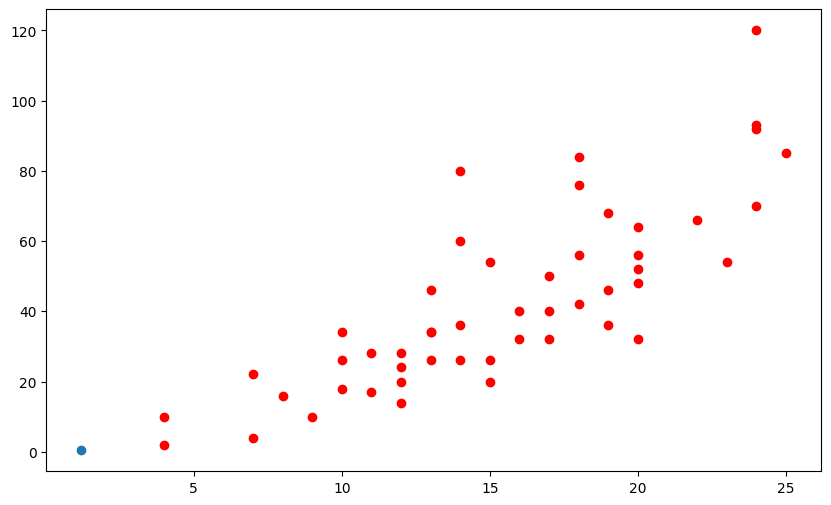

In [13]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(newdata,pre)
plt.show()
